In [16]:
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt

<b>Ile będzie wynosiła orientacyjna cena mieszkania za 5 lat?</b>

In [17]:
initial_value = 120000
rate = 0.05
number_period = 5
payment = 0

house_price = round(np.abs(npf.fv(rate, number_period, payment, initial_value)),3)

print(f"Orientacyjna cena mieszkania wynosi: {house_price} zł")


Orientacyjna cena mieszkania wynosi: 153153.788 zł


<b>Ile musisz wpłacać do banku każdego miesiąca, aby przy przedstawionej ofercie uzbierać na mieszkanie w ciągu 5 lat?</b>

In [18]:
amount_periods = 60
proc = 0.12/12
initial_capital = 0
payment_per_month = npf.pmt(proc, amount_periods, initial_capital, house_price)
print(f"Co miesiąc muszę wpłacać {np.abs(round(payment_per_month,3))} zł")

Co miesiąc muszę wpłacać 1875.284 zł


<b>Stwórz wykres przedstawiający, jak w interwałach miesięcznych zmieniać się będzie cena mieszkania (liniowy wzrost w całym okresie) oraz wartość twojej lokaty.</b>

In [19]:
periods = np.arange(1,5*12+1,dtype=int)
deposit_values_by_five_years = np.around(npf.ppmt(proc, periods, amount_periods, -house_price),3).cumsum()
deposit_values_by_five_years


array([  1875.284,   3769.32 ,   5682.297,   7614.404,   9565.832,
        11536.774,  13527.425,  15537.983,  17568.646,  19619.616,
        21691.096,  23783.29 ,  25896.406,  28030.654,  30186.244,
        32363.39 ,  34562.307,  36783.214,  39026.33 ,  41291.877,
        43580.079,  45891.163,  48225.358,  50582.895,  52964.007,
        55368.931,  57797.904,  60251.167,  62728.962,  65231.535,
        67759.134,  70312.009,  72890.413,  75494.601,  78124.831,
        80781.363,  83464.46 ,  86174.388,  88911.415,  91675.813,
        94467.855,  97287.817, 100135.979, 103012.622, 105918.032,
       108852.496, 111816.304, 114809.751, 117833.132, 120886.747,
       123970.898, 127085.891, 130232.033, 133409.637, 136619.017,
       139860.491, 143134.379, 146441.006, 149780.7  , 153153.791])

In [20]:
periods = np.arange(1,5*12+1,dtype=int)
arr_increase_value_per_month = np.around(npf.ppmt(rate/12, periods, number_period*12, initial_value, -house_price),3)
arr_increase_value_per_month = arr_increase_value_per_month.cumsum() + initial_value
arr_increase_value_per_month

array([120487.512, 120977.055, 121468.638, 121962.269, 122457.957,
       122955.711, 123455.539, 123957.449, 124461.45 , 124967.551,
       125475.761, 125986.089, 126498.543, 127013.132, 127529.865,
       128048.752, 128569.801, 129093.021, 129618.421, 130146.01 ,
       130675.797, 131207.792, 131742.003, 132278.44 , 132817.112,
       133358.029, 133901.2  , 134446.634, 134994.34 , 135544.329,
       136096.609, 136651.19 , 137208.082, 137767.294, 138328.836,
       138892.718, 139458.95 , 140027.541, 140598.501, 141171.84 ,
       141747.568, 142325.695, 142906.231, 143489.186, 144074.57 ,
       144662.393, 145252.665, 145845.397, 146440.598, 147038.279,
       147638.451, 148241.123, 148846.306, 149454.011, 150064.248,
       150677.028, 151292.361, 151910.258, 152530.73 , 153153.787])

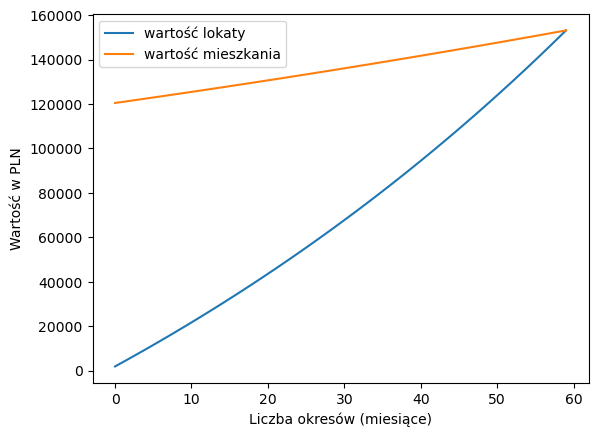

In [21]:
plt.plot(deposit_values_by_five_years,label='wartość lokaty')
plt.plot(arr_increase_value_per_month,label='wartość mieszkania')
plt.xlabel('Liczba okresów (miesiące)')
plt.ylabel('Wartość w PLN')
plt.legend()
plt.show()
